# Recommender System: Laptops
##### Nama: Azel Fabian Azmi

## Deskripsi Proyek

Kebutuhan akan perangkat komputasi yang andal seperti laptop semakin meningkat, baik untuk keperluan pendidikan, pekerjaan, maupun hiburan. Banyaknya pilihan laptop yang beredar di pasaran dengan berbagai merek, spesifikasi, dan harga, seringkali membuat calon pembeli mengalami kesulitan dalam menentukan produk yang paling sesuai dengan kebutuhannya. Konsumen tidak hanya mempertimbangkan faktor harga, tetapi juga spesifikasi teknis seperti jenis prosesor, kapasitas RAM, tipe penyimpanan, ukuran layar, dan sistem operasi. Oleh karena itu, dibutuhkan sebuah sistem cerdas yang mampu memberikan rekomendasi laptop secara otomatis berdasarkan preferensi pengguna. Salah satu pendekatan yang dapat digunakan untuk menjawab permasalahan ini adalah content-based filtering, yaitu metode sistem rekomendasi yang menganalisis kesamaan antar item berdasarkan karakteristik atau fitur yang dimiliki masing-masing produk. Dengan memanfaatkan data spesifikasi laptop dari berbagai brand yang telah tersedia dalam bentuk dataset, sistem ini dapat mengolah informasi tersebut dan menyarankan produk-produk serupa berdasarkan item yang diminati pengguna. Pengembangan sistem rekomendasi ini diharapkan mampu memberikan solusi efisien dalam proses pengambilan keputusan pembelian laptop, serta menjadi dasar untuk pengembangan layanan e-commerce yang lebih personal dan adaptif di masa mendatang.

## Import Library

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
import seaborn as sns
import re
import math

## Data Understanding

| Jenis | Keterangan |
| ------ | ------ |
| Title | _Laptop League: A Comprehensive Dataset for Laptops_ |
| Source | [Kaggle](https://www.kaggle.com/datasets/shrutiambekar/laptop-league-a-comprehensive-dataset-for-laptops/data) |
| Maintainer | [Shruti Ambekar](https://www.kaggle.com/shrutiambekar) |
| License | [CC0: Public Domain](https://creativecommons.org/publicdomain/zero/1.0/) |
| Visibility | Publik |
| Tags | _Data Analytics, Data Visualization, Exploratory Data Analysis, Data Cleaning, Recommender Systems_ |
| View | 4300 |

In [3]:
df = pd.read_csv('Dataset/Laptop_Information.csv')

### Dataset Info

In [4]:
df.head()

,Unnamed: 0,Company,Rating,No_of_ratings,Review,Size,Processor,RAM,Memory,OpSys,Price,MRP,ImgURL
0,0,HP,4.2,253,20,36.0,AMD Ryzen 5 Hexa Core Processor,16,512 GB SSD,64 bit Windows 11,49990,59240,https://rukminim1.flixcart.com/image/312/312/l...
1,1,Lenovo,4.2,974,75,36.0,Intel Core i3 Processor (11th Gen),8,256 GB SSD,64 bit Windows 11,33990,60890,https://rukminim1.flixcart.com/image/312/312/k...
2,2,ASUS,4.4,5389,535,40.0,Intel Core i5 Processor (10th Gen),8,512 GB SSD,Windows 11,49990,70990,https://rukminim1.flixcart.com/image/312/312/l...
3,3,DELL,4.1,332,26,40.0,Processor: Intel i3-1115G4 (Base- 1.7 GHz & Tu...,8,"Display: 15.6"" FHD WVA AG Narrow Border",Graphics & Keyboard: Integrated & Standard Key...,37990,58489,https://rukminim1.flixcart.com/image/312/312/x...
4,4,ASUS,4.2,487,53,40.0,Intel Core i3 Processor (11th Gen),8,512 GB SSD,64 bit Windows 11,35990,50990,https://rukminim1.flixcart.com/image/312/312/x...


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 984 entries, 0 to 983
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     984 non-null    int64  
 1   Company        984 non-null    object 
 2   Rating         984 non-null    float64
 3   No_of_ratings  984 non-null    int64  
 4   Review         984 non-null    int64  
 5   Size           984 non-null    float64
 6   Processor      984 non-null    object 
 7   RAM            984 non-null    int64  
 8   Memory         984 non-null    object 
 9   OpSys          984 non-null    object 
 10  Price          984 non-null    int64  
 11  MRP            984 non-null    int64  
 12  ImgURL         984 non-null    object 
dtypes: float64(2), int64(6), object(5)
memory usage: 100.1+ KB


Dataset ini berisi **984 entri** dengan **13 kolom** yang mencakup informasi terkait spesifikasi dan harga laptop dari berbagai merek. Berikut adalah struktur dan deskripsi setiap kolom:

**1. Unnamed: 0** (`int64`)
- **Deskripsi**: Kolom indeks otomatis dari file CSV saat ekspor. Tidak memiliki makna analitis dan dapat diabaikan atau dihapus saat proses pra-pemrosesan.
- **Contoh**: 0, 1, 2

**2. Company** (`object`)
- **Deskripsi**: Merek atau brand dari laptop.
- **Contoh**: "HP", "ASUS", "Lenovo", "DELL"

**3. Rating** (`float64`)
- **Deskripsi**: Nilai rating rata-rata dari pengguna terhadap laptop, dalam skala 0 sampai 5.
- **Contoh**: 4.2, 4.4, 4.1

**4. No_of_ratings** (`int64`)
- **Deskripsi**: Jumlah total pengguna yang memberikan rating terhadap laptop tersebut.
- **Contoh**: 253, 974, 5389

**5. Review** (`int64`)
- **Deskripsi**: Jumlah ulasan atau review teks yang diberikan pengguna (tidak dijelaskan isi review-nya).
- **Contoh**: 20, 75, 535

**6. Size** (`float64`)
- **Deskripsi**: Ukuran layar laptop dalam satuan inci.
- **Contoh**: 36.0, 40.0

**7. Processor** (`object`)
- **Deskripsi**: Informasi detail mengenai prosesor yang digunakan, mencakup jenis, seri, dan generasi.
- **Contoh**: "Intel Core i3 Processor (11th Gen)", "AMD Ryzen 5 Hexa Core Processor"

**8. RAM** (`int64`)
- **Deskripsi**: Kapasitas RAM laptop dalam satuan gigabyte (GB).
- **Contoh**: 8, 16

**9. Memory** (`object`)
- **Deskripsi**: Informasi penyimpanan laptop, biasanya terdiri dari kapasitas dan jenis penyimpanan (HDD atau SSD).
- **Contoh**: "512 GB SSD", "1 TB HDD"

**10. OpSys** (`object`)
- **Deskripsi**: Sistem operasi yang digunakan pada laptop.
- **Contoh**: "64 bit Windows 11", "Windows 11"

**11. Price** (`int64`)
- **Deskripsi**: Harga jual laptop saat ini di pasaran atau e-commerce (Rupee).
- **Contoh**: 49990, 33990

**12. MRP** (`int64`)
- **Deskripsi**: Harga eceran maksimum (harga asli sebelum diskon).
- **Contoh**: 59240, 70990

**13. ImgURL** (`object`)
- **Deskripsi**: Tautan URL ke gambar produk laptop, biasanya berasal dari situs e-commerce.
- **Contoh**: "https://rukminim1.flixcart.com/image/312/312/l..."


## Exploratory Data Analysis (EDA)

In [6]:
df.shape

(984, 13)

### Pengecekan Data Duplikat dan Nilai Kosong

In [7]:
print(df.duplicated().sum())

0


In [8]:
df.isnull().sum()

Unnamed: 0       0
Company          0
Rating           0
No_of_ratings    0
Review           0
Size             0
Processor        0
RAM              0
Memory           0
OpSys            0
Price            0
MRP              0
ImgURL           0
dtype: int64

Menunjukkan bahwa tidak adanya data yang terduplikat dan missing value.

### Cek Data Unique

In [9]:
df.nunique().sort_values(ascending=False)

Unnamed: 0       984
ImgURL           532
MRP              487
Price            393
No_of_ratings    248
Review           136
Processor         87
OpSys             40
Memory            37
Company           19
Rating            19
Size              16
RAM                4
dtype: int64

### Univariate Analysis

In [10]:
df.describe()

,Unnamed: 0,Rating,No_of_ratings,Review,Size,RAM,Price,MRP
count,984.000000,984.000000,984.000000,984.000000,984.00000,984.000000,984.000000,984.000000
mean,491.500000,4.253597,1372.654472,127.716463,40.82622,11.906504,82145.130081,100740.055894
std,284.200633,0.278828,1633.551255,168.367247,11.53575,5.916286,60318.099605,64373.171119
min,0.000000,1.700000,1.000000,0.000000,29.00000,4.000000,16990.000000,22990.000000
25%,245.750000,4.200000,53.750000,6.000000,36.00000,8.000000,49740.000000,60890.000000
50%,491.500000,4.253597,495.000000,66.500000,40.00000,8.000000,58640.000000,81227.000000
75%,737.250000,4.300000,2841.000000,241.000000,40.00000,16.000000,92442.500000,108172.500000
max,983.000000,5.000000,13376.000000,1904.000000,103.00000,32.000000,399990.000000,467990.000000


- **Kolom `Rating`** mencatat skor rata-rata yang diberikan pengguna terhadap laptop, dengan nilai rata-rata sebesar 4.25 dalam rentang antara 1.7 hingga 5.0, yang menunjukkan bahwa sebagian besar laptop dalam dataset ini dinilai cukup baik oleh konsumen.

- **Kolom `No_of_ratings`** mencerminkan jumlah pengguna yang memberikan rating pada setiap laptop, dengan rata-rata sebanyak 1.372 rating, dan distribusinya sangat bervariasi mulai dari hanya 1 hingga mencapai 13.376, menandakan perbedaan signifikan dalam popularitas produk.

- **Kolom `Review`** menunjukkan jumlah ulasan teks dari pengguna, dengan rata-rata sebanyak 127 ulasan per produk dan nilai maksimum hingga 1.904 ulasan, sementara terdapat juga laptop yang tidak mendapatkan ulasan sama sekali, mengindikasikan tingkat interaksi pengguna yang tidak merata.

- **Kolom `Size`** merepresentasikan ukuran layar laptop dalam inci, dengan rata-rata sebesar 40.82 inci dan rentang nilai dari 29 hingga 103 inci, namun nilai maksimum tersebut tampak tidak realistis dan kemungkinan merupakan anomali atau kesalahan input data.

- **Kolom `RAM`** menunjukkan kapasitas memori utama laptop dalam GB, dengan nilai rata-rata sebesar 11.9 GB dan rentang dari 4 GB hingga 32 GB, mencerminkan variasi dari perangkat entry-level hingga high-end.

- **Kolom `Price`** mencatat harga jual saat ini dari laptop, dengan nilai rata-rata sebesar 82.145 dan kisaran harga dari 16.990 hingga 399.990, menunjukkan adanya produk dari berbagai segmen harga mulai dari murah hingga premium.

- **Kolom `MRP`** atau harga eceran maksimum menunjukkan harga sebelum diskon atau promosi, dengan rata-rata sebesar 100.740 dan nilai maksimum mencapai 467.990, yang memperlihatkan adanya perbedaan harga signifikan dan kemungkinan strategi pemasaran berupa diskon besar.

#### Histogram kolom numerik

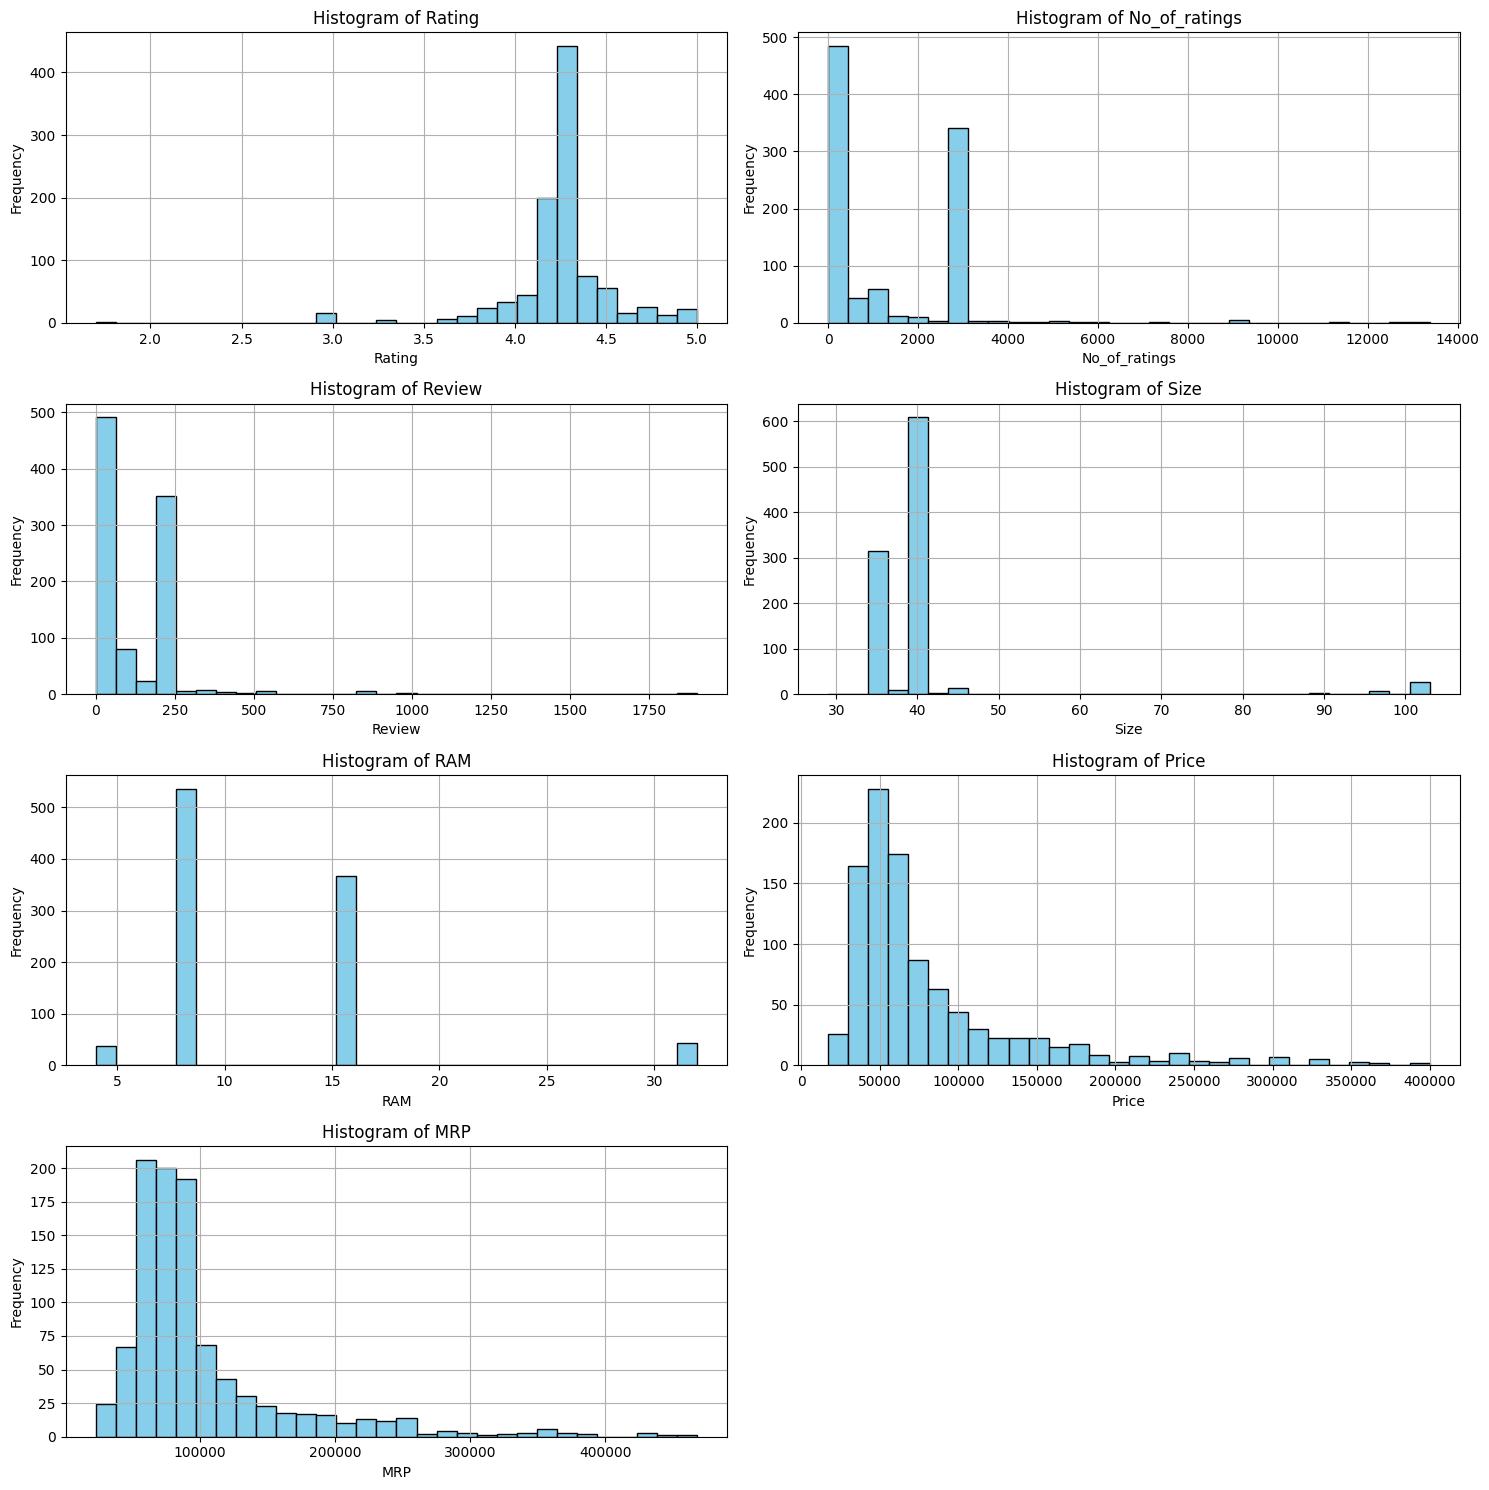

In [11]:
numerical_columns = ['Rating', 'No_of_ratings', 'Review', 'Size', 'RAM', 'Price', 'MRP']

# Buat histogram untuk setiap kolom
plt.figure(figsize=(15, 15))
for i, col in enumerate(numerical_columns, 1):
    plt.subplot(4, 2, i)
    plt.hist(df[col], bins=30, color='skyblue', edgecolor='black')
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.grid(True)

plt.tight_layout()
plt.show()

- **`Rating`**: Distribusinya cenderung condong ke kanan dengan mayoritas laptop memiliki rating antara 4.0 hingga 4.5.

- **`No_of_ratings`** dan **`Review`**: Sangat tidak merata; sebagian besar laptop hanya memiliki sedikit rating atau review, namun ada beberapa outlier dengan jumlah yang sangat tinggi.

- **`Size`**: Terlihat mayoritas ukuran layar laptop berkisar antara 36 hingga 40 inci, sementara nilai ekstrem di atas 100 kemungkinan adalah anomali.

- **`RAM`**: Distribusi bimodal yang jelas—terutama pada RAM 8GB dan 16GB—menunjukkan dua kelompok besar segmentasi pasar.

- **`Price`** dan **`MRP`**: Menunjukkan distribusi miring ke kanan (_right-skewed_), dengan sebagian besar laptop memiliki harga di bawah 150.000, namun terdapat sejumlah produk premium dengan harga sangat tinggi sebagai outlier.

#### Histogram kolom kategorikal

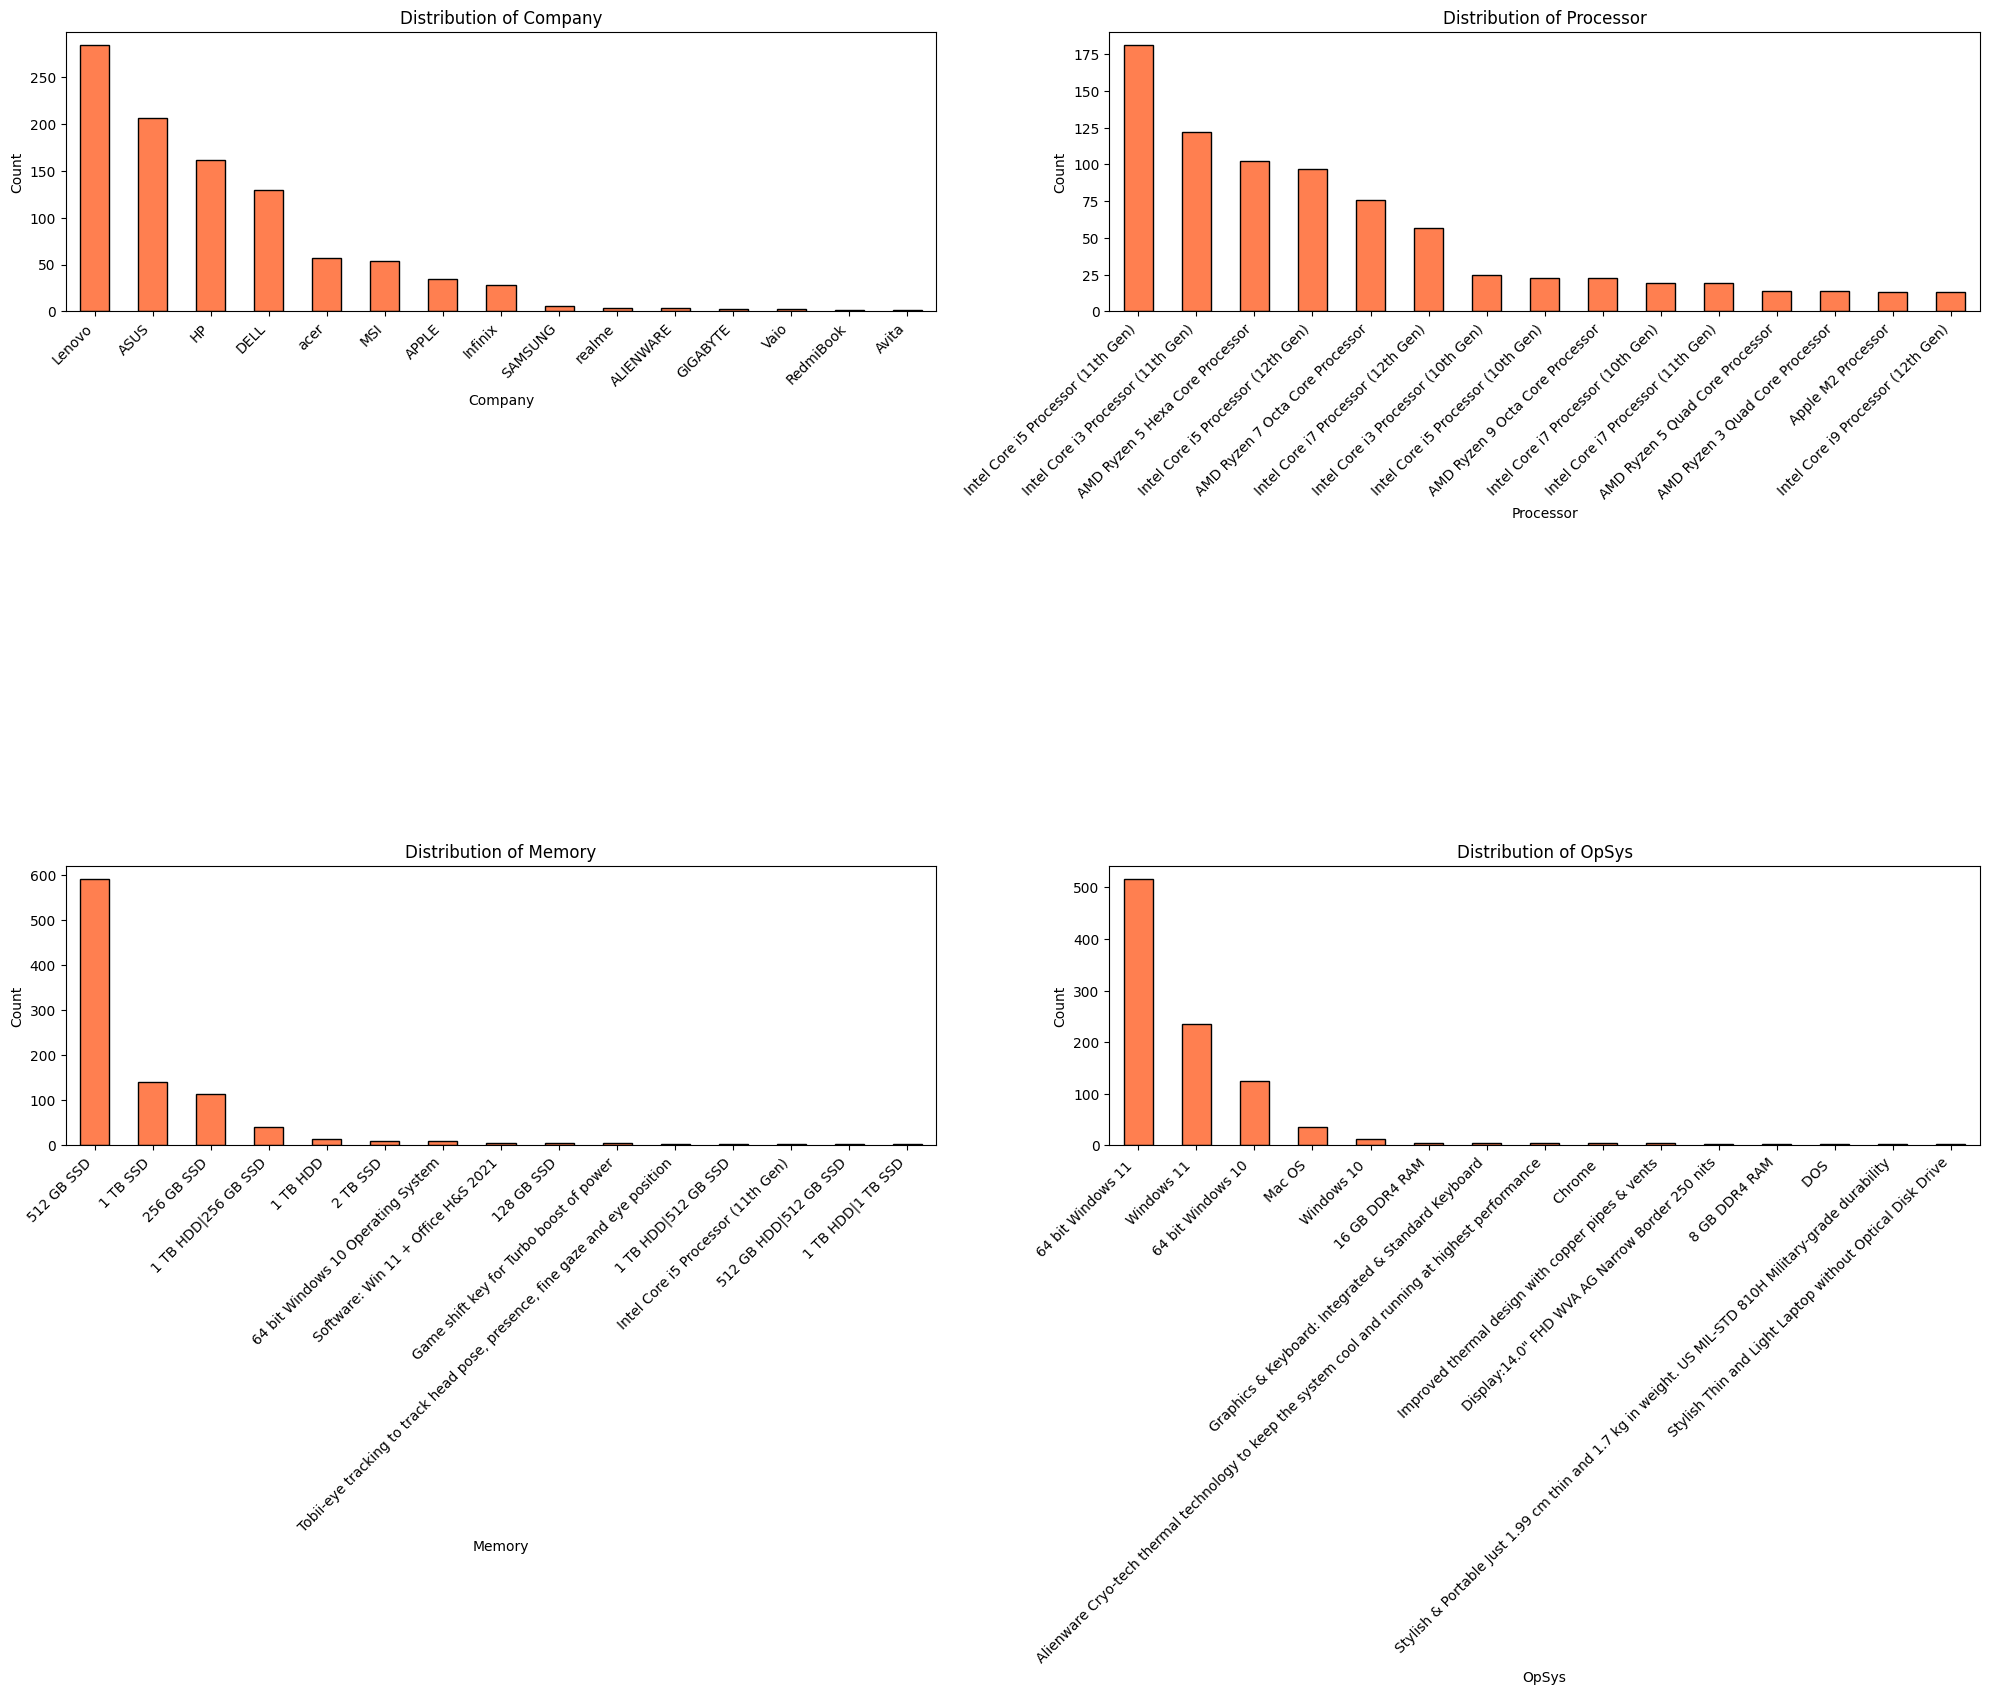

In [12]:
categorical_columns = ['Company', 'Processor', 'Memory', 'OpSys']

# Buat barplot untuk setiap kolom kategorikal
plt.figure(figsize=(20, 20))
for i, col in enumerate(categorical_columns, 1):
    plt.subplot(3, 2, i)
    df[col].value_counts().head(15).plot(kind='bar', color='coral', edgecolor='black')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

- **`Company`**: Merek yang paling dominan adalah Lenovo, ASUS, dan HP, yang mencerminkan dominasi pasar oleh brand-brand besar, sementara brand lain seperti GIGABYTE, ALIENWARE, dan RedmiBook jumlahnya sangat kecil.

- **`Processor`**: Mayoritas laptop menggunakan prosesor Intel, khususnya seri Core i3 dan i5 generasi ke-11 dan ke-12, disusul oleh AMD Ryzen 5 dan Ryzen 7; ini menunjukkan fokus pasar pada prosesor mid-range yang populer untuk penggunaan harian dan produktivitas.

- **`Memory`**: Penyimpanan paling umum adalah 512 GB SSD, jauh mengungguli kombinasi HDD dan SSD lainnya; namun terdapat beberapa entri yang tampak seperti noise atau deskripsi produk yang salah masuk kolom, sehingga perlu dibersihkan lebih lanjut.

- **`OpSys`**: Sistem operasi paling umum adalah 64 bit Windows 11, diikuti oleh Windows 10 dan varian lainnya, namun ada entri seperti deskripsi fitur yang keliru masuk kolom ini (misalnya "Graphics & Keyboard" atau "Stylish Thin and Light Laptop") yang menunjukkan perlunya preprocessing untuk normalisasi data.

### Multivariate Analysis

#### Heatmap korelasi antar variabel numerik

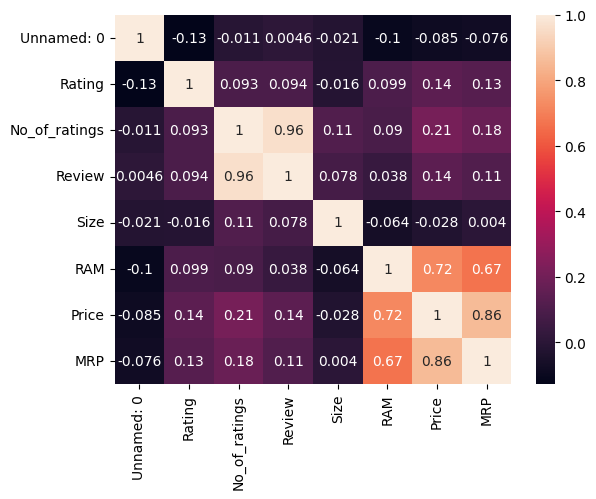

In [13]:
sns.heatmap(df.corr(numeric_only=True),annot=True)
plt.show()

- Terdapat korelasi yang cukup kuat antara `Price` dan `MRP` (nilai korelasi mendekati 1), yang masuk akal karena keduanya merepresentasikan harga, meskipun `MRP` adalah harga sebelum diskon.

- `No_of_ratings` dan `Review` juga memiliki korelasi yang cukup tinggi, menandakan bahwa semakin banyak pengguna yang memberikan rating, maka kemungkinan besar review teks juga meningkat.

- Variabel seperti `RAM`, `Size`, dan `Rating` memiliki korelasi yang rendah terhadap harga (Price), yang artinya spesifikasi ini tidak secara langsung menentukan harga laptop dalam dataset ini, atau ada variabel lain yang lebih dominan (seperti merek atau fitur tambahan).

#### Grafik scatter plot antara RAM dan Harga (Price)

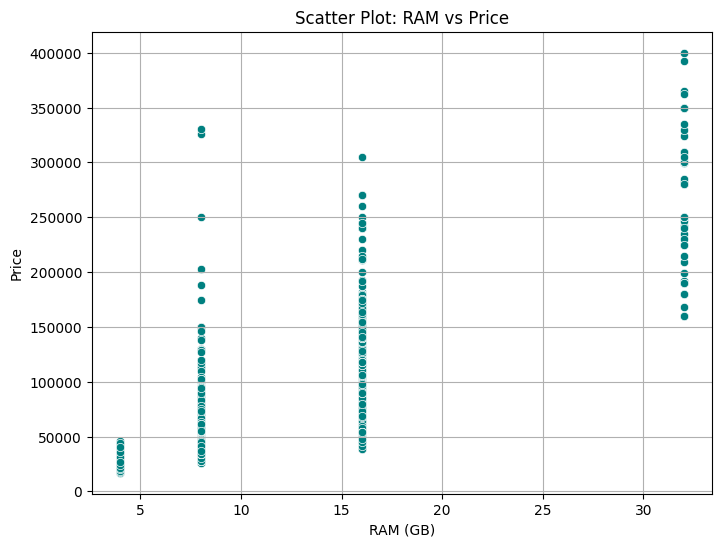

In [14]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='RAM', y='Price', data=df, color='teal')
plt.title('Scatter Plot: RAM vs Price')
plt.xlabel('RAM (GB)')
plt.ylabel('Price')
plt.grid(True)
plt.show()

- Secara umum, terlihat bahwa semakin besar kapasitas RAM, cenderung harga laptop juga meningkat, meskipun hubungan ini tidak linear sempurna.

- Terjadi tumpukan harga yang cukup tinggi pada RAM 8GB dan 16GB, yang memang merupakan konfigurasi paling umum di pasar.

- Beberapa laptop dengan RAM tinggi (32GB) berada di kisaran harga premium, namun masih ada juga laptop dengan RAM besar namun harga relatif lebih terjangkau, kemungkinan karena spesifikasi lain yang lebih rendah (seperti prosesor atau storage).

#### Grafik scatter plot antara Rating dan Price

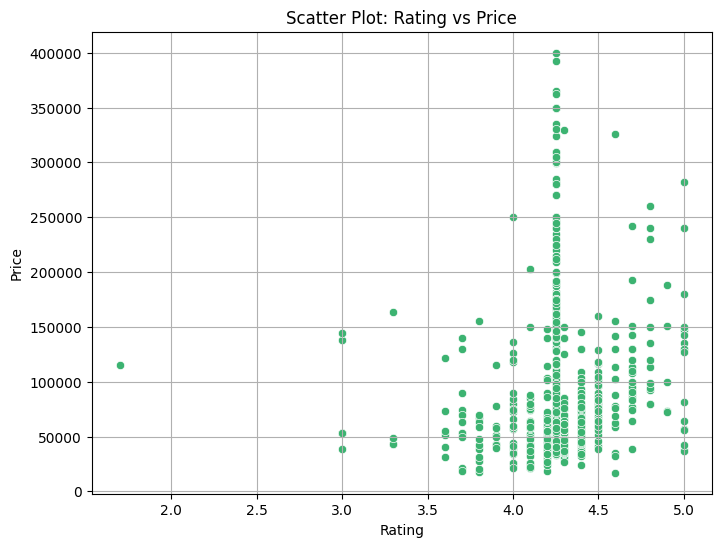

In [15]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Rating', y='Price', data=df, color='mediumseagreen')
plt.title('Scatter Plot: Rating vs Price')
plt.xlabel('Rating')
plt.ylabel('Price')
plt.grid(True)
plt.show()

- Tidak terdapat pola hubungan yang jelas antara rating dan harga laptop.

- Laptop dengan harga tinggi tidak selalu memiliki rating yang tinggi, begitu juga sebaliknya. Beberapa laptop dengan harga relatif rendah justru mendapat rating tinggi dari pengguna.

- Distribusi rating sangat padat di kisaran 4.0 hingga 4.5, mencerminkan bahwa mayoritas laptop dinilai cukup baik oleh pengguna terlepas dari harganya.

#### Boxplot distribusi harga (Price) laptop berdasarkan Company

C:\Users\Administrator\AppData\Local\Temp\ipykernel_14260\3649270025.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Company', y='Price', data=df, palette='Set3')


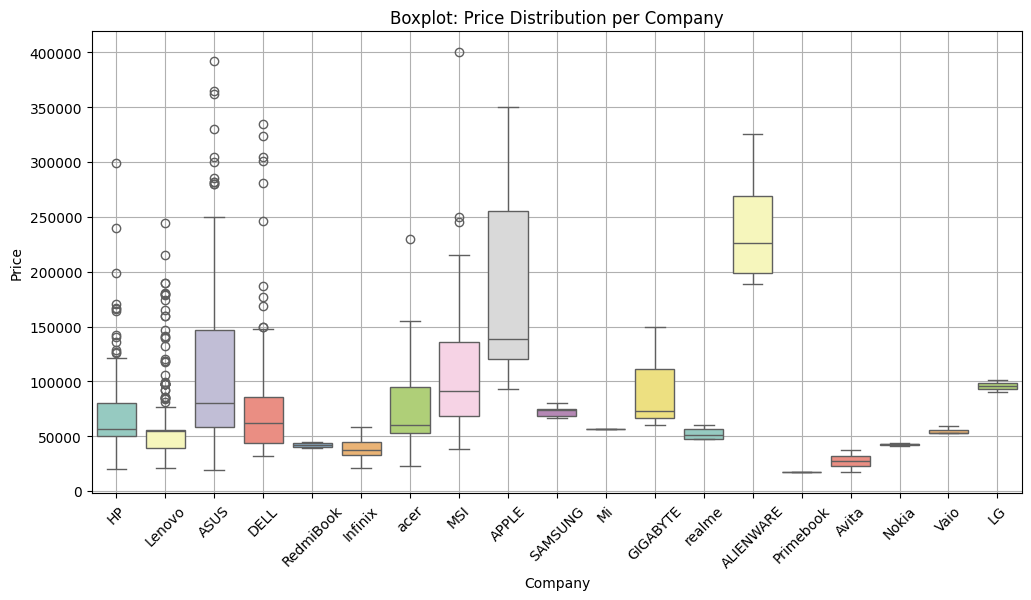

In [16]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Company', y='Price', data=df, palette='Set3')
plt.title('Boxplot: Price Distribution per Company')
plt.xlabel('Company')
plt.ylabel('Price')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

- **Apple** dan **Microsoft** tampak memiliki harga median yang paling tinggi, menunjukkan bahwa produk mereka lebih condong ke segmen premium.

- Brand seperti **Infinix**, **Avita**, dan **RedmiBook** menunjukkan harga median yang lebih rendah, sesuai dengan positioning mereka sebagai brand entry-level atau value-for-money.

- Sebagian besar brand seperti **HP**, **Lenovo**, **ASUS**, dan **DELL** menunjukkan variasi harga yang cukup lebar, mencerminkan banyaknya varian produk dari low hingga high-end.

- Terdapat beberapa outlier harga sangat tinggi, kemungkinan berasal dari seri gaming atau laptop profesional dengan spesifikasi sangat tinggi.

## Data Preprocessing

### Drop Columns

In [17]:
df_cleaned = df.drop(columns=['Unnamed: 0', 'ImgURL'])

df_cleaned.head()

,Company,Rating,No_of_ratings,Review,Size,Processor,RAM,Memory,OpSys,Price,MRP
0,HP,4.2,253,20,36.0,AMD Ryzen 5 Hexa Core Processor,16,512 GB SSD,64 bit Windows 11,49990,59240
1,Lenovo,4.2,974,75,36.0,Intel Core i3 Processor (11th Gen),8,256 GB SSD,64 bit Windows 11,33990,60890
2,ASUS,4.4,5389,535,40.0,Intel Core i5 Processor (10th Gen),8,512 GB SSD,Windows 11,49990,70990
3,DELL,4.1,332,26,40.0,Processor: Intel i3-1115G4 (Base- 1.7 GHz & Tu...,8,"Display: 15.6"" FHD WVA AG Narrow Border",Graphics & Keyboard: Integrated & Standard Key...,37990,58489
4,ASUS,4.2,487,53,40.0,Intel Core i3 Processor (11th Gen),8,512 GB SSD,64 bit Windows 11,35990,50990


Menghapus kolom `Unnamed: 0` karena tidak diperlukan dan hanya berisikan index dan kolom `ImgURL` karena hanya berupa link gambar.

### Handling Outlier

In [18]:
df_cleaned['Size'].describe()

count    984.00000
mean      40.82622
std       11.53575
min       29.00000
25%       36.00000
50%       40.00000
75%       40.00000
max      103.00000
Name: Size, dtype: float64

In [19]:
df_cleaned = df_cleaned[df_cleaned['Size'] <= 50]

df_cleaned['Size'].describe()

count    949.000000
mean      38.657534
std        2.293289
min       29.000000
25%       36.000000
50%       40.000000
75%       40.000000
max       46.000000
Name: Size, dtype: float64

Mayoritas laptop memiliki ukuran layar antara 36 hingga 40 inci. Namun, terdapat nilai maksimum sebesar 103 inci, yang sangat tidak realistis untuk ukuran layar laptop dan kemungkinan besar adalah outlier atau kesalahan input.

Maka, buang entri dengan ukuran layar di atas 50 inci sebagai outlier (karena laptop umumnya tidak lebih dari 20 inci).

### Normalize data

#### Processor

In [20]:
df['Processor'].value_counts().head(40)

Processor
Intel Core i5 Processor (11th Gen)                                                                                         181
Intel Core i3 Processor (11th Gen)                                                                                         122
AMD Ryzen 5 Hexa Core Processor                                                                                            102
Intel Core i5 Processor (12th Gen)                                                                                          97
AMD Ryzen 7 Octa Core Processor                                                                                             76
Intel Core i7 Processor (12th Gen)                                                                                          57
Intel Core i3 Processor (10th Gen)                                                                                          25
Intel Core i5 Processor (10th Gen)                                                                   

In [21]:
def simplify_processor(text):
    if pd.isnull(text):
        return "Unknown"
    text = text.lower()

    if 'm1' in text or 'm2' in text:
        return 'Apple M1/M2'
    elif 'celeron' in text:
        return 'Intel Celeron'
    elif 'pentium' in text:
        return 'Intel Pentium'
    elif 'athlon' in text:
        return 'AMD Athlon'
    elif 'ryzen' in text:
        match = re.search(r'ryzen\s*([rR]?[3579])', text)
        return f'AMD Ryzen {match.group(1).replace("R", "")}' if match else 'AMD Ryzen'
    elif 'intel' in text:
        match = re.search(r'i[3579]', text)
        return f'Intel Core {match.group(0)}' if match else 'Intel Other'
    elif 'amd' in text:
        match = re.search(r'ryzen\s*[3579]', text)
        return f'AMD Ryzen {match.group(0)}' if match else 'AMD Other'
    else:
        return 'Other'

# Terapkan fungsi ke kolom Processor
df_cleaned['Processor_Short'] = df['Processor'].apply(simplify_processor)

# Tampilkan 10 nilai paling umum
df_cleaned['Processor_Short'].value_counts().head(10)

Processor_Short
Intel Core i5    298
Intel Core i3    164
AMD Ryzen 5      122
Intel Core i7    112
AMD Ryzen 7       84
Apple M1/M2       35
Other             32
Intel Core i9     25
AMD Ryzen 3       24
AMD Ryzen 9       24
Name: count, dtype: int64

Kolom `Processor` disederhanakan menjadi brand dan seri utama saja. Kemudian nilai lain yang tidak cocok dengan pola umum seperti "NVIDIA" atau bukan nama processor ditandai sebagai Other.

#### Memory

In [22]:
df['Memory'].value_counts()

Memory
512 GB SSD                                                                         591
1 TB SSD                                                                           140
256 GB SSD                                                                         115
1 TB HDD|256 GB SSD                                                                 40
1 TB HDD                                                                            14
2 TB SSD                                                                            11
64 bit Windows 10 Operating System                                                   9
Software: Win 11 + Office H&S 2021                                                   5
128 GB SSD                                                                           5
Game shift key for Turbo boost of power                                              5
Tobii-eye tracking to track head pose, presence, fine gaze and eye position          4
1 TB HDD|512 GB SSD                 

In [23]:
def extract_storage_capacity(text):
    if pd.isnull(text):
        return "Unknown"
    match = re.search(r'(\d+\s*TB|\d+\s*GB)', text)
    return match.group(0).strip() if match else "Unknown"

def extract_storage_type(text):
    if pd.isnull(text):
        return "Unknown"
    if 'SSD' in text.upper() and 'HDD' in text.upper():
        return 'Hybrid'
    elif 'SSD' in text.upper():
        return 'SSD'
    elif 'HDD' in text.upper():
        return 'HDD'
    else:
        return 'Other'

df_cleaned['Storage_Capacity'] = df_cleaned['Memory'].apply(extract_storage_capacity)
df_cleaned['Storage_Type'] = df_cleaned['Memory'].apply(extract_storage_type)

df_cleaned[['Memory', 'Storage_Capacity', 'Storage_Type']].head(10)

,Memory,Storage_Capacity,Storage_Type
0,512 GB SSD,512 GB,SSD
1,256 GB SSD,256 GB,SSD
2,512 GB SSD,512 GB,SSD
3,"Display: 15.6"" FHD WVA AG Narrow Border",Unknown,Other
4,512 GB SSD,512 GB,SSD
5,512 GB SSD,512 GB,SSD
6,512 GB SSD,512 GB,SSD
7,512 GB SSD,512 GB,SSD
8,512 GB SSD,512 GB,SSD
9,256 GB SSD,256 GB,SSD


Kolom `Memory` dipisahkan menjadi dua bagian yang lebih bersih. 

- `Storage_Capacity` berisi ukuran penyimpanan seperti 512 GB, 256 GB, atau 1 TB.

- `Storage_Type` mengelompokkan tipe penyimpanan menjadi SSD, HDD, atau Hybrid.

Sebagian data (Other, Unknown) berasal dari entri yang bukan spesifikasi penyimpanan, misalnya seperti deskripsi layar atau fitur tambahan.

#### OpSys

In [24]:
df['OpSys'].value_counts()

OpSys
64 bit Windows 11                                                                                          516
Windows 11                                                                                                 235
64 bit Windows 10                                                                                          125
Mac OS                                                                                                      35
Windows 10                                                                                                  12
16 GB DDR4 RAM                                                                                               4
Graphics & Keyboard: Integrated & Standard Keyboard                                                          4
Alienware Cryo-tech thermal technology to keep the system cool and running at highest performance            4
Chrome                                                                                                    

In [25]:
def simplify_os(text):
    if pd.isnull(text):
        return "Unknown"
    text = text.lower()
    if 'windows 11' in text:
        return 'Windows 11'
    elif 'windows 10' in text:
        return 'Windows 10'
    elif 'windows' in text:
        return 'Windows (Other)'
    elif 'dos' in text:
        return 'DOS'
    elif 'ubuntu' in text:
        return 'Ubuntu'
    else:
        return 'Other'

# Terapkan ke kolom OpSys
df_cleaned['OS_Simplified'] = df_cleaned['OpSys'].apply(simplify_os)

# Tampilkan distribusi OS yang telah disederhanakan
df_cleaned['OS_Simplified'].value_counts()

OS_Simplified
Windows 11         719
Windows 10         135
Other               91
DOS                  3
Windows (Other)      1
Name: count, dtype: int64

Kolom OpSys dinormalisasi menjadi OS_Simplified, dengan hasil sebagai berikut:

- Windows 11 mendominasi dengan 719 entri

- Windows 10 sebanyak 135 entri

- DOS dan varian Windows lainnya sangat sedikit

- Other berisi data yang tidak sesuai, kemungkinan deskripsi produk yang keliru masuk kolom OS

In [26]:
df_cleaned.head()

,Company,Rating,No_of_ratings,Review,Size,Processor,RAM,Memory,OpSys,Price,MRP,Processor_Short,Storage_Capacity,Storage_Type,OS_Simplified
0,HP,4.2,253,20,36.0,AMD Ryzen 5 Hexa Core Processor,16,512 GB SSD,64 bit Windows 11,49990,59240,AMD Ryzen 5,512 GB,SSD,Windows 11
1,Lenovo,4.2,974,75,36.0,Intel Core i3 Processor (11th Gen),8,256 GB SSD,64 bit Windows 11,33990,60890,Intel Core i3,256 GB,SSD,Windows 11
2,ASUS,4.4,5389,535,40.0,Intel Core i5 Processor (10th Gen),8,512 GB SSD,Windows 11,49990,70990,Intel Core i5,512 GB,SSD,Windows 11
3,DELL,4.1,332,26,40.0,Processor: Intel i3-1115G4 (Base- 1.7 GHz & Tu...,8,"Display: 15.6"" FHD WVA AG Narrow Border",Graphics & Keyboard: Integrated & Standard Key...,37990,58489,Intel Core i3,Unknown,Other,Other
4,ASUS,4.2,487,53,40.0,Intel Core i3 Processor (11th Gen),8,512 GB SSD,64 bit Windows 11,35990,50990,Intel Core i3,512 GB,SSD,Windows 11


#### Data Cleaning

In [27]:
invalid_storage_os = df_cleaned[
    (df_cleaned['Storage_Type'] == 'Other') |
    (df_cleaned['OS_Simplified'] == 'Other')
]

invalid_count = invalid_storage_os.shape[0]
sample_invalid = invalid_storage_os[['Memory', 'Storage_Type', 'OpSys', 'OS_Simplified']].sample(5, random_state=42)

invalid_count, sample_invalid

(92,
                                                 Memory Storage_Type  \
 301                 64 bit Windows 10 Operating System        Other   
 188                 Software: Win 11 + Office H&S 2021        Other   
 405  Tobii-eye tracking to track head pose, presenc...        Other   
 580            Display: 15.6" FHD WVA AG Narrow Border        Other   
 3              Display: 15.6" FHD WVA AG Narrow Border        Other   
 
                                                  OpSys OS_Simplified  
 301                                      8 GB DDR4 RAM         Other  
 188  Display: 15.6" FHD WVA AG Narrow Border 120Hz ...         Other  
 405  Alienware Cryo-tech thermal technology to keep...         Other  
 580  Graphics & Keyboard: Integrated & Standard Key...         Other  
 3    Graphics & Keyboard: Integrated & Standard Key...         Other  )

Ditemukan 92 entri dalam dataset yang memiliki nilai Other baik pada kolom:

- `Storage_Type` → berisi teks non-storage seperti "Display: 15.6"...", "Software:...", dll.

- `OS_Simplified` → berisi deskripsi umum, bukan nama sistem operasi.

In [28]:
df_cleaned = df_cleaned[
    (df_cleaned['Storage_Type'] != 'Other') &
    (df_cleaned['OS_Simplified'] != 'Other')
]

df_cleaned.shape

(857, 15)

#### Konversi Harga Rupee ke IDR

In [29]:
conversion_rate = 189 # Harga Rupee ke IDR pada jam 3:35PM 7/7/2025

df_cleaned['Price'] = df_cleaned['Price'] * conversion_rate

#### Encoding

In [30]:
# One Hot Encoding
df_encoded = pd.get_dummies(
    df_cleaned[['Company', 'Processor_Short', 'Storage_Capacity', 'Storage_Type', 'OS_Simplified']],
    prefix_sep='_',
    drop_first=False  
)

In [31]:
df_features = pd.concat([
    df_encoded,
    df_cleaned[['RAM', 'Size', 'Rating', 'Price']]
], axis=1)

df_features

,Company_ASUS,Company_Avita,Company_DELL,Company_GIGABYTE,Company_HP,Company_Infinix,Company_LG,Company_Lenovo,Company_MSI,Company_Mi,...,Storage_Type_Hybrid,Storage_Type_SSD,OS_Simplified_DOS,OS_Simplified_Windows (Other),OS_Simplified_Windows 10,OS_Simplified_Windows 11,RAM,Size,Rating,Price
0,False,False,False,False,True,False,False,False,False,False,...,False,True,False,False,False,True,16,36.0,4.200000,9448110
1,False,False,False,False,False,False,False,True,False,False,...,False,True,False,False,False,True,8,36.0,4.200000,6424110
2,True,False,False,False,False,False,False,False,False,False,...,False,True,False,False,False,True,8,40.0,4.400000,9448110
4,True,False,False,False,False,False,False,False,False,False,...,False,True,False,False,False,True,8,40.0,4.200000,6802110
5,False,False,False,False,False,False,False,False,False,False,...,False,True,False,False,False,True,8,40.0,4.100000,7369110
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
979,False,False,False,False,False,False,False,True,False,False,...,False,True,False,False,False,True,8,40.0,4.300000,11527110
980,False,False,False,False,False,False,False,False,True,False,...,False,True,False,False,False,True,8,40.0,3.600000,13889610
981,False,False,False,False,False,False,False,True,False,False,...,False,True,False,False,True,False,16,34.0,4.253597,32985603
982,False,True,False,False,False,False,False,False,False,False,...,False,True,False,False,True,False,8,36.0,4.100000,6991110


## Modelling

In [32]:
from sklearn.metrics.pairwise import cosine_similarity

# Ambil satu laptop secara acak
np.random.seed(42)
random_index = np.random.randint(0, len(df_features))
query_vector = df_features.iloc[random_index].values.reshape(1, -1)

# Hitung cosine similarity dengan semua laptop
similarity_scores = cosine_similarity(query_vector, df_features.values).flatten()

# Buat DataFrame untuk hasil rekomendasi
df_cleaned_with_score = df_cleaned.copy()
df_cleaned_with_score['Similarity'] = similarity_scores

# Urutkan dari yang paling mirip, kecuali dirinya sendiri (drop index asal)
recommendations = df_cleaned_with_score.drop(index=random_index).sort_values(by='Similarity', ascending=False).head(5)

random_index, df_cleaned.iloc[random_index][['Company', 'Processor', 'RAM', 'Memory', 'Price']], recommendations[['Company', 'Processor', 'RAM', 'Memory', 'Price', 'Similarity']]

(102,
 Company                                    acer
 Processor    Intel Core i7 Processor (11th Gen)
 RAM                                          16
 Memory                      1 TB HDD|512 GB SSD
 Price                                  18142110
 Name: 121, dtype: object,
     Company                           Processor  RAM               Memory  \
 156    acer  Intel Core i7 Processor (11th Gen)   16  1 TB HDD|512 GB SSD   
 121    acer  Intel Core i7 Processor (11th Gen)   16  1 TB HDD|512 GB SSD   
 412    acer  Intel Core i7 Processor (10th Gen)   16  1 TB HDD|256 GB SSD   
 73      MSI  Intel Core i7 Processor (10th Gen)   16             1 TB SSD   
 709    ASUS  Intel Core i7 Processor (12th Gen)   16             1 TB SSD   
 
         Price  Similarity  
 156  18142110         1.0  
 121  18142110         1.0  
 412  18331110         1.0  
 73   17669610         1.0  
 709  18692100         1.0  )

In [33]:
def recommend_laptops(brand=None, processor=None, ram=None, storage=None, os=None, price_range=None, top_n=5):
    query = df_cleaned.copy()

    # Filter berdasarkan input (jika diberikan)
    if brand:
        query = query[query['Company'].str.lower() == brand.lower()]
    if processor:
        query = query[query['Processor_Short'].str.lower() == processor.lower()]
    if ram:
        query = query[query['RAM'] == ram]
    if storage:
        query = query[query['Storage_Type'].str.lower() == storage.lower()]
    if os:
        query = query[query['OS_Simplified'].str.lower() == os.lower()]
    if price_range:
        min_price, max_price = price_range
        query = query[(query['Price'] >= min_price) & (query['Price'] <= max_price)]

    # Jika tidak ada hasil dari filter
    if query.empty:
        return "Tidak ditemukan laptop dengan kriteria tersebut."

    # Ambil index pertama dari hasil query
    ref_index = query.index[0]
    ref_vector = df_features.loc[ref_index].values.reshape(1, -1)

    # Hitung similarity
    similarity = cosine_similarity(ref_vector, df_features.values).flatten()
    df_cleaned_copy = df_cleaned.copy()
    df_cleaned_copy['Similarity'] = similarity

    # Ambil top-n hasil rekomendasi, kecuali dirinya sendiri
    result = df_cleaned_copy.drop(index=ref_index).sort_values(by='Similarity', ascending=False).head(top_n)
    return result[['Company', 'Processor', 'RAM', 'Memory', 'OS_Simplified', 'Price', 'Similarity']]

# Contoh penggunaan
recommend_laptops(
    brand='asus',
    processor='intel core i7',
    ram=16,
    storage='ssd',
    os='windows 11',
    price_range=(19000000, 35000000),
    top_n=5
)

,Company,Processor,RAM,Memory,OS_Simplified,Price,Similarity
436,ASUS,Intel Core i7 Processor (12th Gen),16,1 TB SSD,Windows 11,26458110,1.0
874,ASUS,AMD Ryzen 9 Octa Core Processor,16,1 TB SSD,Windows 11,28537110,1.0
221,GIGABYTE,Intel Core i7 Processor (12th Gen),16,1 TB SSD,Windows 11,28348110,1.0
218,ASUS,AMD Ryzen 7 Octa Core Processor,16,1 TB SSD,Windows 11,27781110,1.0
612,ASUS,Intel Core i7 Processor (12th Gen),16,1 TB SSD,Windows 11,27200502,1.0


## Evaluation

In [ ]:
def precision_at_k(recommended_items, relevant_items, k=5):
    recommended_at_k = recommended_items[:k]
    relevant_at_k = [item for item in recommended_at_k if item in relevant_items]
    precision = len(relevant_at_k) / k
    return precision

def recall_at_k(recommended_items, relevant_items, k=5):
    recommended_at_k = recommended_items[:k]
    relevant_at_k = [item for item in recommended_at_k if item in relevant_items]
    recall = len(relevant_at_k) / len(relevant_items) if relevant_items else 0
    return recall

relevant = [436, 218, 612]
recommended = [436, 874, 221, 218, 612]

prec = precision_at_k(recommended, relevant, k=5)
rec = recall_at_k(recommended, relevant, k=5)

print(f"Precision@5: {prec:.2f}")
print(f"Recall@5: {rec:.2f}")

Precision@5: 0.60
Recall@5: 1.00
